# Supplemental Materials

## Installs

In [2]:
#!pip install pandas
#!pip install xlrd
#!pip install seaborn
#!pip install statsmodels
#!pip install researchpy

In [3]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.multicomp
import researchpy as rp

# Suppress Warnings (not in the blog post)
import warnings
warnings.filterwarnings("ignore")

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [5]:
from pandas import ExcelWriter
from pandas import ExcelFile

## SET Analyses

### SET Initial Change 

#### Two-way ANOVA

In [192]:
df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_revised.xlsx', sheet_name='SET Inset', index_col=0) 
df = pd.DataFrame(df, columns= ['plots','initialchanges','sediments','nutrients'])

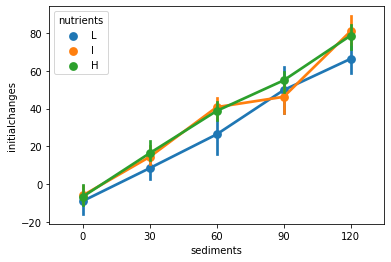

In [193]:
ax = sns.pointplot(x='sediments', y='initialchanges', hue='nutrients', data=df)

In [194]:
#df.boxplot(column='initialchanges', by='sediments');
#sns.violinplot(x="sediments", y="initialchanges", data=df);

In [195]:
rp.summary_cont(df['initialchanges'].groupby(df['sediments']))

,N,Mean,SD,SE,95% Conf.,Interval
sediments,,,,,,
0,12,-7.0769,5.8548,1.6901,-10.7968,-3.3569
30,12,13.1685,6.9540,2.0075,8.7501,17.5869
60,12,35.3083,10.0829,2.9107,28.9020,41.7147
90,12,50.2921,10.6150,3.0643,43.5477,57.0366
120,12,75.2247,10.3374,2.9842,68.6566,81.7928


In [199]:
#Approach 2 - Check the interaction of groups
formula = 'initialchanges ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         initialchanges   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     51.23
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           6.71e-23
Time:                        18:06:18   Log-Likelihood:                -204.03
No. Observations:                  60   AIC:                             438.1
Df Residuals:                      45   BIC:                             469.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -6.5167      4.188     -1.556      0.127     -14.952       1.919
C(sediments)[T.30]                       22.9712      5.923      3.878      0.000      11.042      34.901
C(sediments)[T.60]                       45.2837      5.923      7.646      0.000      33.354      57.213
C(sediments)[T.90]                       61.4206      5.923     10.370      0.000      49.491      73.350
C(sediments)[T.120]                      85.0785      5.923     14.364      0.000      73.149      97.008
C(nutrients)[T.I]                         0.6386      5.923      0.108      0.915     -11.291      12.568
C(nutrients)[T.L]                        -2.3190      5.923     -0.392      0.697     -14.248       9.610
C(sediments)[T.30]:C(nutrients)[T.I]     -2.5952      8.376     -0.310      0.758     -19.466      14.275
C(sediments)[T.60]:C(nutrients)[T.I]      1.3578      8.376      0.162      0.872     -15.513      18.228
C(sediments)[T.90]:C(nutrients)[T.I]     -9.3409      8.376     -1.115      0.271     -26.212       7.530
C(sediments)[T.120]:C(nutrients)[T.I]     1.6495      8.376      0.197      0.845     -15.221      18.520
C(sediments)[T.30]:C(nutrients)[T.L]     -5.5823      8.376     -0.666      0.509     -22.453      11.288
C(sediments)[T.60]:C(nutrients)[T.L]    -10.0534      8.376     -1.200      0.236     -26.924       6.817
C(sediments)[T.90]:C(nutrients)[T.L]     -2.8139      8.376     -0.336      0.738     -19.685      14.057
C(sediments)[T.120]:C(nutrients)[T.L]    -9.9801      8.376     -1.191      0.240     -26.851       6.891
==============================================================================
Omnibus:                        1.433   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                1.207
Skew:                          -0.156   Prob(JB):                        0.547
Kurtosis:                       2.379   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
res2 = sm.stats.anova_lm(model, typ=2)
print(res2.round(4))

                               sum_sq    df         F  PR(>F)
C(sediments)               49031.8075   4.0  174.7099  0.0000
C(nutrients)                 749.4841   2.0    5.3411  0.0083
C(sediments):C(nutrients)    535.5215   8.0    0.9541  0.4831
Residual                    3157.2779  45.0       NaN     NaN


#### Normality Assumption Check

In [197]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
#p-value is >0.05 for all groups, hence, we can conclude that they follow the Gaussian Distribution

0.9783595204353333 0.3631591796875


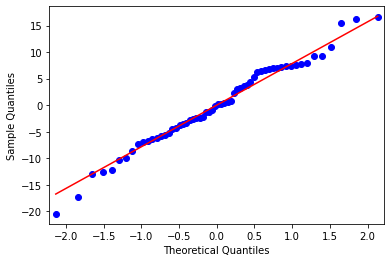

In [198]:
# QQ Plot Test
#Check the Normal distribution of residuals
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()

#### Homogeneity Check

#### Post-hoc Check

In [200]:
mc = statsmodels.stats.multicomp.MultiComparison(df['initialchanges'],df['sediments'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0     30  20.2453  0.001  9.8974 30.5933   True
     0     60  42.3852  0.001 32.0373 52.7331   True
     0     90   57.369  0.001 47.0211 67.7169   True
     0    120  82.3016  0.001 71.9537 92.6495   True
    30     60  22.1399  0.001 11.7919 32.4878   True
    30     90  37.1236  0.001 26.7757 47.4716   True
    30    120  62.0563  0.001 51.7083 72.4042   True
    60     90  14.9838 0.0013  4.6359 25.3317   True
    60    120  39.9164  0.001 29.5685 50.2643   True
    90    120  24.9326  0.001 14.5847 35.2805   True
----------------------------------------------------


In [201]:
mc = statsmodels.stats.multicomp.MultiComparison(df['initialchanges'],df['nutrients'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     H      I  -1.1472    0.9  -24.291 21.9967  False
     H      L  -8.0049   0.67 -31.1487 15.1389  False
     I      L  -6.8577 0.7377 -30.0015 16.2861  False
-----------------------------------------------------


### SET Rate

#### Two-way ANOVA

In [12]:
df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_revised.xlsx', sheet_name='SET Inset', index_col=0) 
df = pd.DataFrame(df, columns= ['plots','rate','sediments','nutrients'])

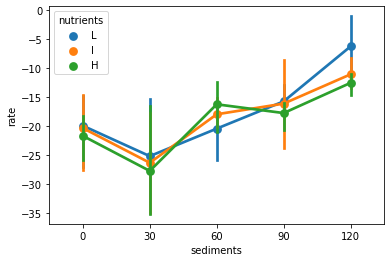

In [13]:
ax = sns.pointplot(x='sediments', y='rate', hue='nutrients', data=df)

In [14]:
#df.boxplot(column='initialchanges', by='sediments');
#sns.violinplot(x="sediments", y="initialchanges", data=df);

In [15]:
rp.summary_cont(df['rate'].groupby(df['sediments']))

,N,Mean,SD,SE,95% Conf.,Interval
sediments,,,,,,
0,12,-20.6346,6.1510,1.7756,-24.5427,-16.7264
30,12,-26.4041,10.0146,2.8910,-32.7670,-20.0411
60,12,-18.1898,4.6249,1.3351,-21.1283,-15.2512
90,12,-16.5088,5.4287,1.5671,-19.9581,-13.0596
120,12,-9.9117,4.6726,1.3488,-12.8805,-6.9429


In [16]:
#Approach 2 - Check the interaction of groups
formula = 'rate ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     2.800
Date:                Sun, 19 Jul 2020   Prob (F-statistic):            0.00448
Time:                        21:19:47   Log-Likelihood:                -192.74
No. Observations:                  60   AIC:                             415.5
Df Residuals:                      45   BIC:                             446.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               -21.6646      3.470     -6.243      0.000     -28.654     -14.676
C(sediments)[T.30]                       -6.0603      4.907     -1.235      0.223     -15.944       3.824
C(sediments)[T.60]                        5.4496      4.907      1.111      0.273      -4.434      15.333
C(sediments)[T.90]                        3.9375      4.907      0.802      0.427      -5.946      13.821
C(sediments)[T.120]                       9.1596      4.907      1.867      0.068      -0.724      19.043
C(nutrients)[T.I]                         1.3389      4.907      0.273      0.786      -8.545      11.223
C(nutrients)[T.L]                         1.7514      4.907      0.357      0.723      -8.132      11.635
C(sediments)[T.30]:C(nutrients)[T.I]      0.0703      6.940      0.010      0.992     -13.908      14.048
C(sediments)[T.60]:C(nutrients)[T.I]     -3.0628      6.940     -0.441      0.661     -17.041      10.915
C(sediments)[T.90]:C(nutrients)[T.I]      0.2952      6.940      0.043      0.966     -13.683      14.273
C(sediments)[T.120]:C(nutrients)[T.I]     0.1366      6.940      0.020      0.984     -13.841      14.114
C(sediments)[T.30]:C(nutrients)[T.L]      0.8022      6.940      0.116      0.908     -13.176      14.780
C(sediments)[T.60]:C(nutrients)[T.L]     -5.9518      6.940     -0.858      0.396     -19.930       8.026
C(sediments)[T.90]:C(nutrients)[T.L]      0.2694      6.940      0.039      0.969     -13.708      14.247
C(sediments)[T.120]:C(nutrients)[T.L]     4.5531      6.940      0.656      0.515      -9.425      18.531
==============================================================================
Omnibus:                        2.030   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.260
Skew:                           0.296   Prob(JB):                        0.533
Kurtosis:                       3.392   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
res2 = sm.stats.anova_lm(model, typ=2)
print(res2.round(4))

                              sum_sq    df       F  PR(>F)
C(sediments)               1736.4688   4.0  9.0134  0.0000
C(nutrients)                 28.4294   2.0  0.2951  0.7459
C(sediments):C(nutrients)   123.2264   8.0  0.3198  0.9543
Residual                   2167.3542  45.0     NaN     NaN


#### Normality Assumption Check

In [18]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
#p-value is >0.05 for all groups, hence, we can conclude that they follow the Gaussian Distribution

0.9804325103759766 0.4471059739589691


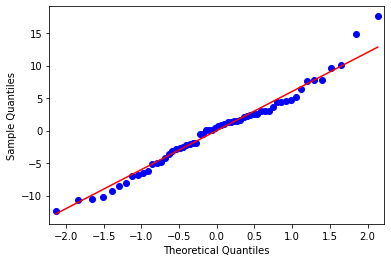

In [20]:
# QQ Plot Test
#Check the Normal distribution of residuals
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

#### Homogeneity Check

#### Post-hoc Check

In [21]:
mc = statsmodels.stats.multicomp.MultiComparison(df['rate'],df['sediments'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0     30  -5.7695  0.204 -13.246   1.707  False
     0     60   2.4448 0.8803 -5.0317  9.9213  False
     0     90   4.1257 0.5273 -3.3508 11.6023  False
     0    120  10.7229 0.0015  3.2463 18.1994   True
    30     60   8.2143 0.0245  0.7378 15.6908   True
    30     90   9.8952  0.004  2.4187 17.3718   True
    30    120  16.4924  0.001  9.0158 23.9689   True
    60     90   1.6809    0.9 -5.7956  9.1575  False
    60    120   8.2781  0.023  0.8015 15.7546   True
    90    120   6.5971 0.1082 -0.8794 14.0737  False
----------------------------------------------------


In [22]:
mc = statsmodels.stats.multicomp.MultiComparison(df['rate'],df['nutrients'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     H      I   0.8267    0.9 -5.5695 7.2229  False
     H      L    1.686 0.7824 -4.7102 8.0822  False
     I      L   0.8593    0.9 -5.5369 7.2555  False
---------------------------------------------------


### SET Net

#### Two-way ANOVA

In [30]:
df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_revised.xlsx', sheet_name='SET Inset', index_col=0) 
df = pd.DataFrame(df, columns= ['plots','net','sediments','nutrients'])

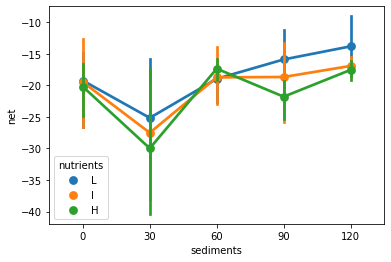

In [31]:
ax = sns.pointplot(x='sediments', y='net', hue='nutrients', data=df)

In [32]:
#df.boxplot(column='initialchanges', by='sediments');
#sns.violinplot(x="sediments", y="initialchanges", data=df);

In [33]:
rp.summary_cont(df['net'].groupby(df['sediments']))

,N,Mean,SD,SE,95% Conf.,Interval
sediments,,,,,,
0,12,-19.6406,6.0324,1.7414,-23.4734,-15.8078
30,12,-27.5542,10.4907,3.0284,-34.2197,-20.8888
60,12,-18.3500,3.5928,1.0371,-20.6328,-16.0673
90,12,-18.7898,5.8493,1.6885,-22.5062,-15.0733
120,12,-16.0936,3.8045,1.0983,-18.5108,-13.6763


In [34]:
#Approach 2 - Check the interaction of groups
formula = 'net ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    net   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     1.622
Date:                Sun, 19 Jul 2020   Prob (F-statistic):              0.110
Time:                        21:34:02   Log-Likelihood:                -192.25
No. Observations:                  60   AIC:                             414.5
Df Residuals:                      45   BIC:                             445.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               -20.2024      3.442     -5.870      0.000     -27.134     -13.271
C(sediments)[T.30]                       -9.7833      4.867     -2.010      0.050     -19.586       0.020
C(sediments)[T.60]                        2.8469      4.867      0.585      0.562      -6.956      12.650
C(sediments)[T.90]                       -1.5972      4.867     -0.328      0.744     -11.400       8.206
C(sediments)[T.120]                       2.6568      4.867      0.546      0.588      -7.146      12.460
C(nutrients)[T.I]                         0.7210      4.867      0.148      0.883      -9.082      10.524
C(nutrients)[T.L]                         0.9644      4.867      0.198      0.844      -8.839      10.767
C(sediments)[T.30]:C(nutrients)[T.I]      1.7467      6.883      0.254      0.801     -12.117      15.610
C(sediments)[T.60]:C(nutrients)[T.I]     -2.0997      6.883     -0.305      0.762     -15.963      11.764
C(sediments)[T.90]:C(nutrients)[T.I]      2.4034      6.883      0.349      0.729     -11.460      16.267
C(sediments)[T.120]:C(nutrients)[T.I]    -0.0957      6.883     -0.014      0.989     -13.959      13.768
C(sediments)[T.30]:C(nutrients)[T.L]      3.8622      6.883      0.561      0.578     -10.001      17.726
C(sediments)[T.60]:C(nutrients)[T.L]     -2.5694      6.883     -0.373      0.711     -16.433      11.294
C(sediments)[T.90]:C(nutrients)[T.L]      4.9406      6.883      0.718      0.477      -8.923      18.804
C(sediments)[T.120]:C(nutrients)[T.L]     2.7664      6.883      0.402      0.690     -11.097      16.630
==============================================================================
Omnibus:                        3.211   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.923
Skew:                          -0.090   Prob(JB):                        0.232
Kurtosis:                       4.066   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
res2 = sm.stats.anova_lm(model, typ=2)
print(res2.round(4))

                              sum_sq    df       F  PR(>F)
C(sediments)                919.2741   4.0  4.8507  0.0024
C(nutrients)                 77.3911   2.0  0.8167  0.4483
C(sediments):C(nutrients)    79.0149   8.0  0.2085  0.9879
Residual                   2132.0467  45.0     NaN     NaN


#### Normality Assumption Check

In [36]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
#p-value is >0.05 for all groups, hence, we can conclude that they follow the Gaussian Distribution

0.9703836441040039 0.15236896276474


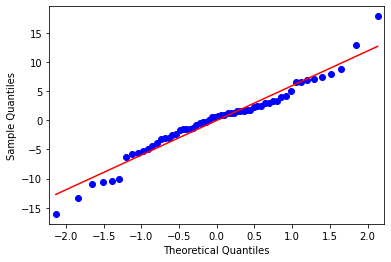

In [37]:
# QQ Plot Test
#Check the Normal distribution of residuals
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

#### Homogeneity Check

#### Post-hoc Check

In [39]:
mc = statsmodels.stats.multicomp.MultiComparison(df['net'],df['sediments'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0     30  -7.9136 0.0313 -15.3408 -0.4865   True
     0     60   1.2906    0.9  -6.1366  8.7177  False
     0     90   0.8508    0.9  -6.5763   8.278  False
     0    120    3.547 0.6439  -3.8801 10.9742  False
    30     60   9.2042 0.0081   1.7771 16.6313   True
    30     90   8.7645  0.013   1.3374 16.1916   True
    30    120  11.4607  0.001   4.0335 18.8878   True
    60     90  -0.4397    0.9  -7.8668  6.9874  False
    60    120   2.2565    0.9  -5.1706  9.6836  False
    90    120   2.6962 0.8238  -4.7309 10.1233  False
-----------------------------------------------------


In [40]:
mc = statsmodels.stats.multicomp.MultiComparison(df['net'],df['nutrients'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     H      I   1.1119 0.8732 -4.5273 6.7512  False
     H      L   2.7644 0.4719 -2.8749 8.4036  False
     I      L   1.6524 0.7422 -3.9869 7.2917  False
---------------------------------------------------


## AGBM Analyses

## BGBM Analysis

#### Two-way ANOVA

In [72]:
df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_revised.xlsx', sheet_name='BGBM', index_col=0) 
df = pd.DataFrame(df, columns= ['Plot','lngcm3','sediments','nutrients'])

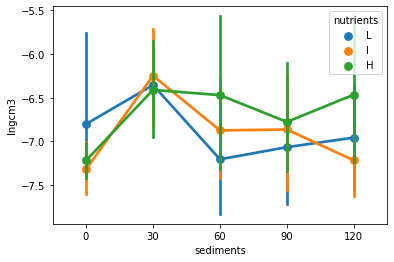

In [73]:
ax = sns.pointplot(x='sediments', y='lngcm3', hue='nutrients', data=df)

In [74]:
#df.boxplot(column='initialchanges', by='sediments');
#sns.violinplot(x="sediments", y="initialchanges", data=df);

In [75]:
rp.summary_cont(df['lngcm3'].groupby(df['sediments']))

,N,Mean,SD,SE,95% Conf.,Interval
sediments,,,,,,
0,12,-7.1134,0.6321,0.1825,-7.5150,-6.7118
30,24,-6.3379,0.7935,0.1620,-6.6730,-6.0028
60,24,-6.8499,1.0521,0.2148,-7.2941,-6.4056
90,23,-6.9041,0.9788,0.2041,-7.3274,-6.4808
120,24,-6.8797,0.9934,0.2028,-7.2992,-6.4603


In [76]:
#Approach 2 - Check the interaction of groups
formula = 'lngcm3 ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lngcm3   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9799
Date:                Sun, 19 Jul 2020   Prob (F-statistic):              0.480
Time:                        22:07:39   Log-Likelihood:                -137.94
No. Observations:                 107   AIC:                             305.9
Df Residuals:                      92   BIC:                             346.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -7.2190      0.474    -15.243      0.000      -8.160      -6.278
C(sediments)[T.30]                        0.8084      0.580      1.394      0.167      -0.344       1.960
C(sediments)[T.60]                        0.7487      0.580      1.291      0.200      -0.403       1.901
C(sediments)[T.90]                        0.4419      0.580      0.762      0.448      -0.710       1.594
C(sediments)[T.120]                       0.7545      0.580      1.301      0.197      -0.397       1.907
C(nutrients)[T.I]                        -0.1007      0.670     -0.150      0.881      -1.431       1.229
C(nutrients)[T.L]                         0.4173      0.670      0.623      0.535      -0.913       1.748
C(sediments)[T.30]:C(nutrients)[T.I]      0.2630      0.820      0.321      0.749      -1.366       1.892
C(sediments)[T.60]:C(nutrients)[T.I]     -0.3032      0.820     -0.370      0.713      -1.932       1.326
C(sediments)[T.90]:C(nutrients)[T.I]      0.0138      0.830      0.017      0.987      -1.635       1.662
C(sediments)[T.120]:C(nutrients)[T.I]    -0.6531      0.820     -0.796      0.428      -2.282       0.976
C(sediments)[T.30]:C(nutrients)[T.L]     -0.3615      0.820     -0.441      0.660      -1.991       1.268
C(sediments)[T.60]:C(nutrients)[T.L]     -1.1521      0.820     -1.405      0.164      -2.781       0.477
C(sediments)[T.90]:C(nutrients)[T.L]     -0.7066      0.820     -0.861      0.391      -2.336       0.923
C(sediments)[T.120]:C(nutrients)[T.L]    -0.9094      0.820     -1.109      0.270      -2.539       0.720
==============================================================================
Omnibus:                        2.999   Durbin-Watson:                   2.575
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.936
Skew:                           0.398   Prob(JB):                        0.230
Kurtosis:                       2.846   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
res2 = sm.stats.anova_lm(model, typ=2)
print(res2.round(4))

                            sum_sq    df       F  PR(>F)
C(sediments)                6.7525   4.0  1.8817  0.1203
C(nutrients)                1.7093   2.0  0.9526  0.3895
C(sediments):C(nutrients)   3.8648   8.0  0.5385  0.8247
Residual                   82.5371  92.0     NaN     NaN


#### Normality Assumption Check

In [36]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
#p-value is >0.05 for all groups, hence, we can conclude that they follow the Gaussian Distribution

0.9703836441040039 0.15236896276474


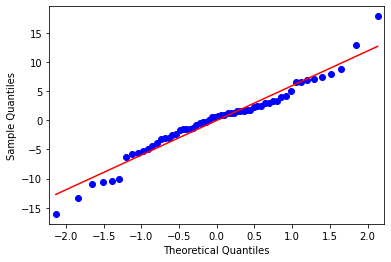

In [37]:
# QQ Plot Test
#Check the Normal distribution of residuals
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

#### Homogeneity Check

#### Post-hoc Check

In [39]:
mc = statsmodels.stats.multicomp.MultiComparison(df['net'],df['sediments'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0     30  -7.9136 0.0313 -15.3408 -0.4865   True
     0     60   1.2906    0.9  -6.1366  8.7177  False
     0     90   0.8508    0.9  -6.5763   8.278  False
     0    120    3.547 0.6439  -3.8801 10.9742  False
    30     60   9.2042 0.0081   1.7771 16.6313   True
    30     90   8.7645  0.013   1.3374 16.1916   True
    30    120  11.4607  0.001   4.0335 18.8878   True
    60     90  -0.4397    0.9  -7.8668  6.9874  False
    60    120   2.2565    0.9  -5.1706  9.6836  False
    90    120   2.6962 0.8238  -4.7309 10.1233  False
-----------------------------------------------------


In [40]:
mc = statsmodels.stats.multicomp.MultiComparison(df['net'],df['nutrients'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     H      I   1.1119 0.8732 -4.5273 6.7512  False
     H      L   2.7644 0.4719 -2.8749 8.4036  False
     I      L   1.6524 0.7422 -3.9869 7.2917  False
---------------------------------------------------


## Decomposition Analysis

## Physicochemical Conditions Analyses

## Nutrient Analyses

## Citations

https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/
https://github.com/marsja/jupyter/blob/master/Python_ANOVA/Python_ANOVA_Factorial_Using_Statsmodels.ipynb
https://github.com/VaibhawKumar/Advanced-Da/blob/master/untitled76.py
https://stackoverflow.com/questions/49963138/label-groups-from-tuekys-test-results-according-to-significant
https://github.com/faragunaj/white-pipeline/blob/0d81ce39205d9763839bdad993f099fc3124d2df/modules.py
https://github.com/search?l=Python&q=levene+test+2+way&type=Code